<a href="https://colab.research.google.com/github/KoshiBG/Python_for_data_analysis/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22hw_4_3_%D0%A0%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%D0%B7_DataFrame_%D0%94%D1%96%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%B0_%D1%80%D0%BE%D0%B7%D1%81%D1%96%D1%8E%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому ДЗ ми потренуємось будувати візуалізації з використанням бібліотеки `maplotlib` для візуалізації даних в `pandas.DataFrame`.

# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Завантажте дані з файла `yulu_rental.csv` у pandas.DataFrame `df`.

In [3]:

data_path = '../content/drive/MyDrive/code/data/yulu_rental.csv'
df = pd.read_csv(data_path)

2. Виведіть

- перші 3 записи з набору даних
- типи даних в наборі даних
- розміри набору даних

In [4]:

df.head(3)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [6]:
df.memory_usage().sum()

1045184

In [15]:
df['time']

,time
0,00:00:00
1,01:00:00
2,02:00:00
3,03:00:00
4,04:00:00
...,...
10881,19:00:00
10882,20:00:00
10883,21:00:00
10884,22:00:00


Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.
Наша колонка тепер стане таймпстемпом і для неї став доступний функціонал, описаний тут

https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

Наприклад, ми можемо легко виокремити дату, день тижня, чи це робочий день, чи ні.

In [14]:
df['datetime'] = pd.to_datetime(df.datetime)
df['time'] = df['datetime'].dt.time


In [13]:
df['registered']

,registered
0,13
1,32
2,27
3,10
4,1
...,...
10881,329
10882,231
10883,164
10884,117


3. З допомогою matplotlib побудуйте найпростіший лінійний графік кількості зареєстрованих користувачів (`registered`) на кожну годину.

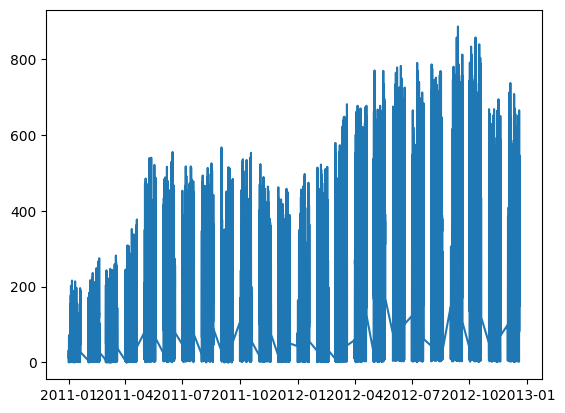

In [17]:
plt.plot(df['datetime'], df['registered']);

Має вийти щось таке:
![](https://drive.google.com/uc?export=view&id=1WX6s9qmiwq_1TSHQtRX0bPL8sT6Gw2BH)

4. Графік виглядає так собі, правда? Давайте загрегуємо дані по дням. Для цього запустіть наступний код аби створити колонку "дата" (без часу) і після цього напишіть самостійно код, аби загрегувати дані і отримати кількість зарестрованих клієнтів на день. Ваша фінальна структура (запишіть її в змінну `df_registered_by_date`) даних має містити дві колонки: дату і кількість зареєстрованих користувачів на цей день.

In [23]:
df['date'] = df.datetime.dt.date


In [21]:
df_registered_by_date = df[['date', 'registered']]
display(df_registered_by_date)

,date,registered
0,2011-01-01,13
1,2011-01-01,32
2,2011-01-01,27
3,2011-01-01,10
4,2011-01-01,1
...,...,...
10881,2012-12-19,329
10882,2012-12-19,231
10883,2012-12-19,164
10884,2012-12-19,117


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1DL7Y-R7_CBWNlQNAnMyAoU8hR2MdF5v7)


5. Тепер побудуйте лінійний графік з matplotlib для даних в `df_registered_by_date`.

  Додайте наступну частину до графіку аби зробити підписи за віссю ОХ більш читаємими

  `plt.xticks(rotation=45, ha='right')`

  Після побудови графіку проаналізуйте його та напишіть, які тенденції щодо зміни кількості зареєстрованих користувачів в часі ви бачите і чому так може бути?

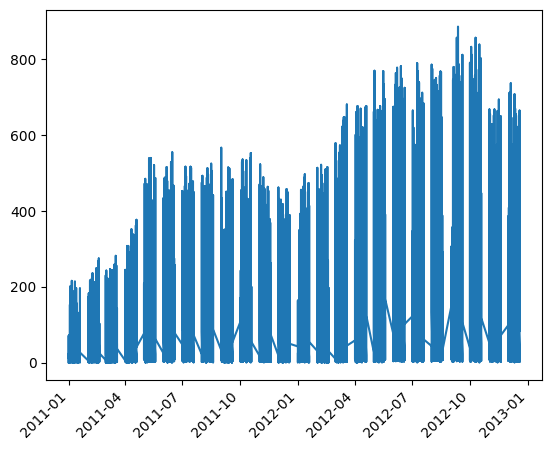

In [29]:
plt.plot(df['date'], df['registered'])
plt.xticks(rotation=45, ha='right');

6. Побудуйте графік розсіювання (scatterplot) між температурою і тим, як вона відчувається (atemp). Поставте прозорість точок 0.2. Додайте підписи до осей Х ат У. Опишіть свої спостереження з цього графіку. Які висновки можна зробити? Що дивного бачите?

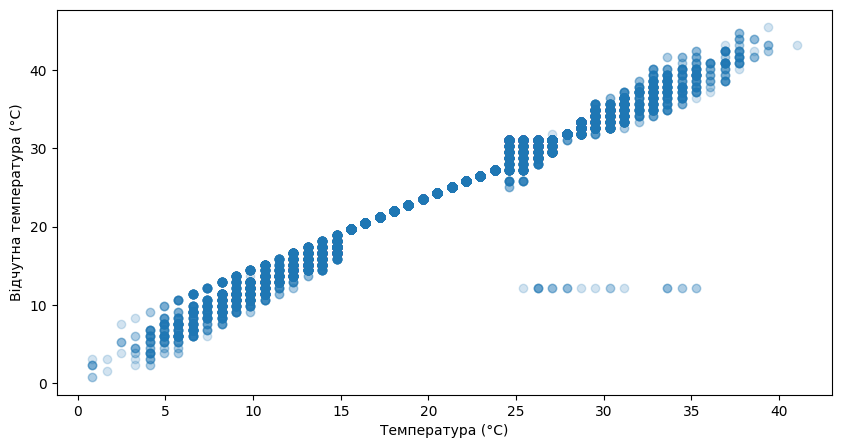

In [45]:
# Створюємо фігуру з більшим розміром
plt.figure(figsize=(10, 5))

# Створюємо графік розсіювання (scatterplot)
plt.scatter(df['temp'], df['atemp'], alpha=0.2);

# Додаємо підписи до осей
plt.xlabel('Температура (°C)')
plt.ylabel('Відчутна температура (°C)');

  Очікуваний графік:
![](https://drive.google.com/uc?export=view&id=13Mi6AGPUh5aQ5YEZjrlkQPuFcNzeeppB)


 На графіку видно, що зі збільшенням фактичної температури (temp), відчутна температура (atemp) також зростає. Це свідчить про позитивну кореляцію між цими двома змінними. Збільшення відчутної температури відбувається майже лінійно разом зі збільшенням фактичної температури, що свідчить про можливу лінійну залежність між цими змінними.Можна зробити висновок, що відчутна температура (atemp) добре корелює з фактичною температурою. Це означає, що при підвищенні фактичної температури люди зазвичай відчувають це підвищення, і різниця між цими значеннями незначна. На проміжку з 25 до 35 спостерігаеться вкид, який треба відфільтрувати.
